In [ ]:
# Import necessary libraries
import pandas as pd

# Define the file path
file_path = 'final_clean_data.csv'

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)

# Convert the data variable to a DataFrame
df = pd.DataFrame(data)


# Display the first few rows of the DataFrame
data.head()

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,rentEstimate_lowerPrice,rentEstimate_currentPrice,rentEstimate_upperPrice,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,history_price
0,51.512982,-0.073698,1.0,2.0,79.0,0.0,Freehold,Flat/Maisonette,2350.0,2550.0,2800.0,444000.0,555000.0,666000.0,LOW,-29445000.0,-98.150000,30000000
1,51.511881,-0.073471,1.0,1.0,54.0,1.0,Leasehold,Purpose Built Flat,2150.0,2300.0,2450.0,447000.0,496000.0,546000.0,MEDIUM,46000.0,10.222222,450000
2,51.517972,-0.078028,2.0,2.0,73.0,1.0,Leasehold,Purpose Built Flat,2800.0,3000.0,3250.0,619000.0,651000.0,684000.0,HIGH,28000.0,4.494382,623000
3,51.517972,-0.078028,2.0,2.0,73.0,1.0,Leasehold,Purpose Built Flat,2800.0,3000.0,3250.0,619000.0,651000.0,684000.0,HIGH,28000.0,4.494382,600000
4,51.517972,-0.078028,2.0,2.0,73.0,1.0,Leasehold,Purpose Built Flat,2800.0,3000.0,3250.0,619000.0,651000.0,684000.0,HIGH,28000.0,4.494382,235000


In [181]:
# Maksimum fiyat değerini hesapla
max_price = df['saleEstimate_currentPrice'].max()

# Fiyat aralıklarını dinamik olarak belirle
price_bins = [0, max_price / 4, max_price / 2, (3 * max_price) / 4, max_price]
price_labels = ['very_low', 'low', 'medium', 'high']

# Fiyat aralıklarına göre kategorik hale getirme
df['price_range'] = pd.cut(df['saleEstimate_currentPrice'], 
                           bins=price_bins, 
                           labels=price_labels)

# Maksimum alan değerini hesapla
max_area = df['floorAreaSqM'].max()

# Alan aralıklarını dinamik olarak belirle
area_bins = [0, max_area / 3, (2 * max_area) / 3, max_area]
area_labels = ['small', 'medium', 'large']

# Alan aralıklarına göre kategorik hale getirme
df['area_range'] = pd.cut(df['floorAreaSqM'], 
                          bins=area_bins, 
                          labels=area_labels)

# Oluşan kategorik sütunları kontrol et
print(df[['saleEstimate_currentPrice', 'price_range', 'floorAreaSqM', 'area_range']].head())


   saleEstimate_currentPrice price_range  floorAreaSqM area_range
0                   555000.0    very_low          79.0      small
1                   496000.0    very_low          54.0      small
2                   651000.0    very_low          73.0      small
3                   651000.0    very_low          73.0      small
4                   651000.0    very_low          73.0      small


In [182]:
# Kullanılacak kategorik sütunların seçilmesi
categorical_columns = ['price_range', 'area_range', 'tenure', 'propertyType']

# Kategorik sütunları dummies'e dönüştürme
encoded_data = pd.get_dummies(df[categorical_columns], prefix_sep='_')

# Dönüştürülen veriyi kontrol etme
print(encoded_data.head())


   price_range_very_low  price_range_low  price_range_medium  \
0                  True            False               False   
1                  True            False               False   
2                  True            False               False   
3                  True            False               False   
4                  True            False               False   

   price_range_high  area_range_small  area_range_medium  area_range_large  \
0             False              True              False             False   
1             False              True              False             False   
2             False              True              False             False   
3             False              True              False             False   
4             False              True              False             False   

   tenure_Feudal  tenure_Freehold  tenure_Leasehold  ...  \
0          False             True             False  ...   
1          False          

In [183]:
from sklearn.preprocessing import MinMaxScaler

# Normalizasyon yapılacak sütunlar
numerical_columns = [
    'latitude', 'longitude', 'bathrooms', 'bedrooms', 'livingRooms',
    'floorAreaSqM', 'rentEstimate_lowerPrice', 'rentEstimate_currentPrice',
    'rentEstimate_upperPrice', 'saleEstimate_lowerPrice', 'saleEstimate_currentPrice',
    'saleEstimate_upperPrice', 'saleEstimate_valueChange.numericChange',
    'saleEstimate_valueChange.percentageChange', 'history_price'
]

# Normalizasyon
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Normalleştirilmiş veriyi kontrol etme
print(df[numerical_columns].head())


   latitude  longitude  bathrooms  bedrooms  livingRooms  floorAreaSqM  \
0  0.454361   0.562112   0.111111  0.222222     0.000000      0.140816   
1  0.450431   0.562579   0.111111  0.111111     0.142857      0.089796   
2  0.472175   0.553208   0.222222  0.222222     0.142857      0.128571   
3  0.472175   0.553208   0.222222  0.222222     0.142857      0.128571   
4  0.472175   0.553208   0.222222  0.222222     0.142857      0.128571   

   rentEstimate_lowerPrice  rentEstimate_currentPrice  \
0                 0.020665                   0.020437   
1                 0.018649                   0.018114   
2                 0.025202                   0.024617   
3                 0.025202                   0.024617   
4                 0.025202                   0.024617   

   rentEstimate_upperPrice  saleEstimate_lowerPrice  \
0                 0.020663                 0.017738   
1                 0.017650                 0.017885   
2                 0.024537                 0.02

In [184]:
# Değişim yüzdesini pozitif/negatif olarak ayırma
df['price_change_category'] = df['saleEstimate_valueChange.percentageChange'].apply(lambda x: 'positive' if x > 0 else 'negative')
print(df['price_change_category'].head())


0    positive
1    positive
2    positive
3    positive
4    positive
Name: price_change_category, dtype: object


In [185]:
# Kategorik özelliklerden dummies oluşturma
categorical_columns = ['price_range', 'area_range', 'tenure', 'propertyType', 'price_change_category']
encoded_categorical = pd.get_dummies(df[categorical_columns], prefix_sep='_')

# Sayısal ve kategorik verileri birleştirme
final_data = pd.concat([df[numerical_columns], encoded_categorical], axis=1)

# Son veriyi kontrol etme
print(final_data.head())


   latitude  longitude  bathrooms  bedrooms  livingRooms  floorAreaSqM  \
0  0.454361   0.562112   0.111111  0.222222     0.000000      0.140816   
1  0.450431   0.562579   0.111111  0.111111     0.142857      0.089796   
2  0.472175   0.553208   0.222222  0.222222     0.142857      0.128571   
3  0.472175   0.553208   0.222222  0.222222     0.142857      0.128571   
4  0.472175   0.553208   0.222222  0.222222     0.142857      0.128571   

   rentEstimate_lowerPrice  rentEstimate_currentPrice  \
0                 0.020665                   0.020437   
1                 0.018649                   0.018114   
2                 0.025202                   0.024617   
3                 0.025202                   0.024617   
4                 0.025202                   0.024617   

   rentEstimate_upperPrice  saleEstimate_lowerPrice  ...  \
0                 0.020663                 0.017738  ...   
1                 0.017650                 0.017885  ...   
2                 0.024537      

In [186]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# FP-Growth için sadece kategorik veri kullanıyoruz
fp_data = encoded_categorical.copy()

# FP-Growth yöntemiyle sık öğe kümelerini bulma
frequent_itemsets = fpgrowth(fp_data, min_support=0.05, use_colnames=True)

# Sık öğe kümelerini kontrol etme
print("frequent_itemsets\n", frequent_itemsets)

print("LENGTH\n", len(fp_data))

# Birliktelik kuralları çıkarma
rules = association_rules(frequent_itemsets, num_itemsets=len(fp_data), metric="confidence", min_threshold=0.7)

# Kuralları kontrol etme
print("rules\n", rules)

# Sık öğe kümelerini veri setine özellik olarak ekleme
frequent_itemsets['group'] = frequent_itemsets['itemsets'].apply(lambda x: '_'.join(sorted(list(x))))
fp_data['frequent_group'] = fp_data.apply(lambda row: any(item in row for item in frequent_itemsets['group']), axis=1)



frequent_itemsets
       support                                           itemsets
0    0.999996                   (price_change_category_positive)
1    0.997086                             (price_range_very_low)
2    0.898971                                 (area_range_small)
3    0.393838                                  (tenure_Freehold)
4    0.206041                     (propertyType_Flat/Maisonette)
..        ...                                                ...
118  0.050666  (tenure_Freehold, area_range_small, propertyTy...
119  0.052238  (price_range_very_low, area_range_small, price...
120  0.050666  (price_change_category_positive, tenure_Freeho...
121  0.050655  (price_range_very_low, tenure_Freehold, area_r...
122  0.050655  (tenure_Freehold, price_range_very_low, price_...

[123 rows x 2 columns]
LENGTH
 266607
rules
                                            antecedents  \
0                               (price_range_very_low)   
1                     (price_change_cat

In [187]:
from sklearn.cluster import KMeans

# Clustering için veriyi hazırlama
clustering_data = pd.concat([df[numerical_columns], fp_data], axis=1)

# KMeans algoritmasını uygulama
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['cluster'] = kmeans.fit_predict(clustering_data)

# Sonuçları kontrol etme
print(clustering_data[['cluster']].value_counts())


cluster
0          107221
1          105343
2           54043
Name: count, dtype: int64


In [188]:
# Tablonun yapısını kontrol edin
print(frequent_itemsets.dtypes)


support     float64
itemsets     object
group        object
dtype: object


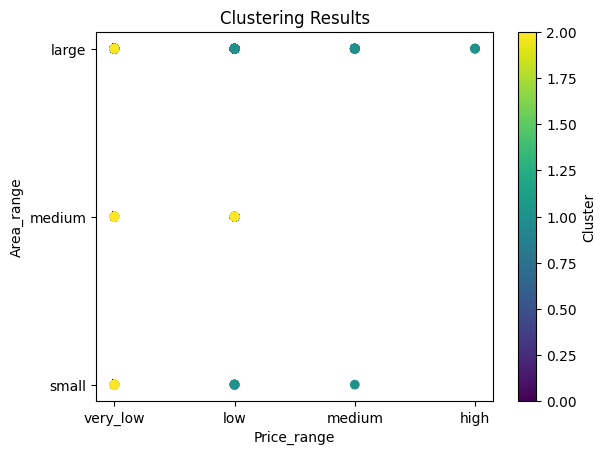

In [189]:
import matplotlib.pyplot as plt

# Latitude ve Longitude bazında kümeleri görselleştirme
plt.scatter(df['price_range'], df['area_range'], c=clustering_data['cluster'], cmap='viridis')
plt.title('Clustering Results')
plt.xlabel('Price_range')
plt.ylabel('Area_range')
plt.colorbar(label='Cluster')
plt.show()


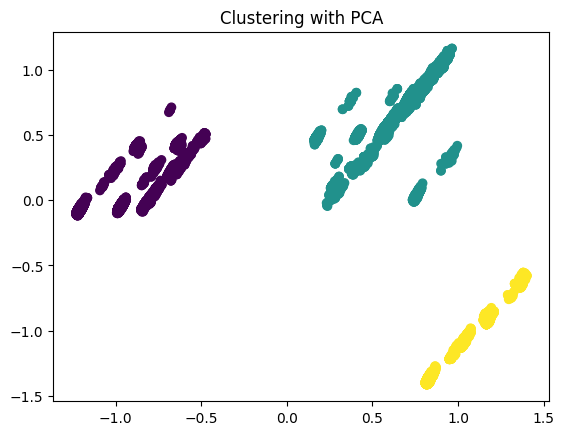

In [190]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustering_data)

# PCA ile kümeleme görselleştirme
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clustering_data['cluster'], cmap='viridis')
plt.title('Clustering with PCA')
plt.show()


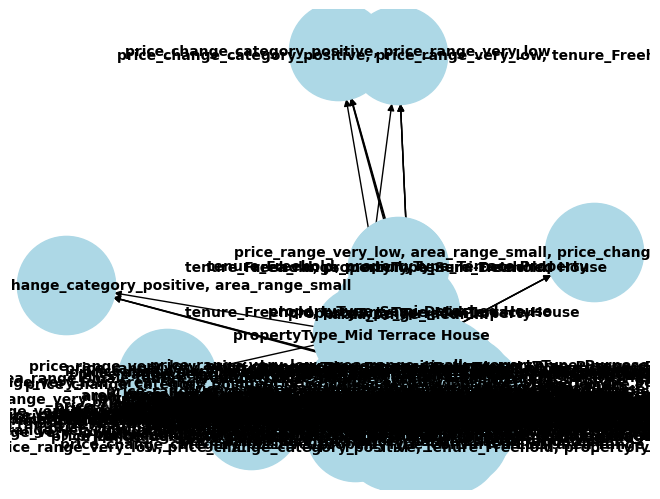

In [191]:
import networkx as nx
import matplotlib.pyplot as plt

# Kuralları bir ağ grafiği ile görselleştirme
G = nx.DiGraph()
for i, rule in rules.iterrows():
    G.add_edge(', '.join(rule['antecedents']), ', '.join(rule['consequents']), weight=rule['confidence'])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="lightblue", font_size=10, font_weight="bold")
plt.show()
